In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyarrow as pa
import pyarrow.parquet as pq
import geopandas as gpd
import seaborn as sns
import datetime as dt
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
from scipy import stats
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_parquet('FemaDataWithWaterDepthStatistics2.parquet.gzip')

In [5]:
#get rid of NaNs for proportionLeqOne
df = df[~df['proportionLeqOne'].isna()]

## K Means

In [34]:
df_zero = df[df['waterDepth'] == 0]

In [35]:
# Data preparation
X = df_zero[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp']]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans clustering
kmeans0 = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans0.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [36]:
# Get boolean masks for each cluster
mask_cluster_one = kmeans0.labels_ == 0
mask_cluster_two = kmeans0.labels_ == 1
mask_cluster_three = kmeans0.labels_ == 2


cluster_one0 = df_zero[mask_cluster_one]
cluster_two0 = df_zero[mask_cluster_two]
cluster_three0 = df_zero[mask_cluster_three]


In [37]:
df_one = df[df['waterDepth'] == 1]

In [38]:
# Data preparation
X = df_one[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp']]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans clustering
kmeans1 = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans1.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [39]:
# Get boolean masks for each cluster from kmeans1
mask_cluster_one = kmeans1.labels_ == 0
mask_cluster_two = kmeans1.labels_ == 1
mask_cluster_three = kmeans1.labels_ == 2

cluster_one1 = df_one[mask_cluster_one]
cluster_two1 = df_one[mask_cluster_two]
cluster_three1 = df_one[mask_cluster_three]

In [40]:
df_two = df[df['waterDepth'] == 2]

In [41]:
# Data preparation
X = df_two[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp']]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans clustering
kmeans2 = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans2.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [42]:
# Get boolean masks for each cluster
mask_cluster_one = kmeans2.labels_ == 0
mask_cluster_two = kmeans2.labels_ == 1
mask_cluster_three = kmeans2.labels_ == 2


cluster_one2 = df_two[mask_cluster_one]
cluster_two2 = df_two[mask_cluster_two]
cluster_three2 = df_two[mask_cluster_three]


In [46]:
df_six = df[df['waterDepth'] == 6]

In [47]:
# Data preparation
X = df_six[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp']]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans clustering
kmeans6 = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans6.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [48]:
# Get boolean masks for each cluster
mask_cluster_one = kmeans6.labels_ == 0
mask_cluster_two = kmeans6.labels_ == 1
mask_cluster_three = kmeans6.labels_ == 2


cluster_one6 = df_six[mask_cluster_one]
cluster_two6 = df_six[mask_cluster_two]
cluster_three6 = df_six[mask_cluster_three]


In [60]:
from scipy.spatial import distance

# Get cluster centroids for df_zero (waterDepth = 0)
centroids_0 = kmeans0.cluster_centers_

# Get cluster centroids for df_one (waterDepth = 1)
centroids_1 = kmeans1.cluster_centers_

# Measure distances between centroids from different subsets
distances = distance.cdist(centroids_0, centroids_1, 'euclidean')

# Get the index of the closest cluster in df_one for each cluster in df_zero
similar_clusters = distances.argmin(axis=1)

# Print out the similar clusters
for i, idx in enumerate(similar_clusters):
    print(f"Cluster {i} in df_zero is most similar to Cluster {idx} in df_one.")


Cluster 0 in df_zero is most similar to Cluster 2 in df_one.
Cluster 1 in df_zero is most similar to Cluster 0 in df_one.
Cluster 2 in df_zero is most similar to Cluster 1 in df_one.


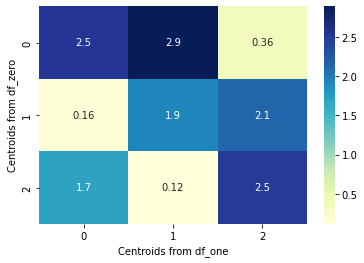

In [61]:
import seaborn as sns

sns.heatmap(distances, annot=True, cmap='YlGnBu')
plt.xlabel('Centroids from df_one')
plt.ylabel('Centroids from df_zero')
plt.show()


In [62]:
from scipy.spatial import distance

# Get cluster centroids for df_zero (waterDepth = 0)
centroids_0 = kmeans1.cluster_centers_

# Get cluster centroids for df_one (waterDepth = 1)
centroids_1 = kmeans2.cluster_centers_

# Measure distances between centroids from different subsets
distances = distance.cdist(centroids_0, centroids_1, 'euclidean')

# Get the index of the closest cluster in df_one for each cluster in df_zero
similar_clusters = distances.argmin(axis=1)

# Print out the similar clusters
for i, idx in enumerate(similar_clusters):
    print(f"Cluster {i} in df_zero is most similar to Cluster {idx} in df_one.")


Cluster 0 in df_zero is most similar to Cluster 2 in df_one.
Cluster 1 in df_zero is most similar to Cluster 0 in df_one.
Cluster 2 in df_zero is most similar to Cluster 1 in df_one.


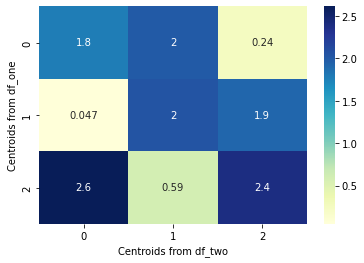

In [63]:
import seaborn as sns

sns.heatmap(distances, annot=True, cmap='YlGnBu')
plt.xlabel('Centroids from df_two')
plt.ylabel('Centroids from df_one')
plt.show()


In [64]:
from scipy.spatial import distance

# Get cluster centroids for df_zero (waterDepth = 0)
centroids_0 = kmeans0.cluster_centers_

# Get cluster centroids for df_one (waterDepth = 1)
centroids_1 = kmeans6.cluster_centers_

# Measure distances between centroids from different subsets
distances = distance.cdist(centroids_0, centroids_1, 'euclidean')

# Get the index of the closest cluster in df_one for each cluster in df_zero
similar_clusters = distances.argmin(axis=1)

# Print out the similar clusters
for i, idx in enumerate(similar_clusters):
    print(f"Cluster {i} in df_zero is most similar to Cluster {idx} in df_one.")


Cluster 0 in df_zero is most similar to Cluster 1 in df_one.
Cluster 1 in df_zero is most similar to Cluster 0 in df_one.
Cluster 2 in df_zero is most similar to Cluster 2 in df_one.


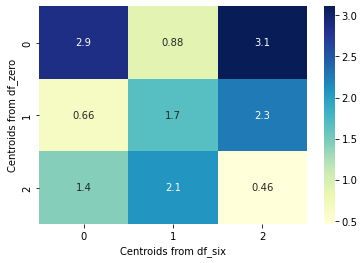

In [65]:
import seaborn as sns

sns.heatmap(distances, annot=True, cmap='YlGnBu')
plt.xlabel('Centroids from df_six')
plt.ylabel('Centroids from df_zero')
plt.show()


In [66]:
from scipy.spatial import distance

# Get cluster centroids for df_zero (waterDepth = 0)
centroids_0 = kmeans1.cluster_centers_

# Get cluster centroids for df_one (waterDepth = 1)
centroids_1 = kmeans6.cluster_centers_

# Measure distances between centroids from different subsets
distances = distance.cdist(centroids_0, centroids_1, 'euclidean')

# Get the index of the closest cluster in df_one for each cluster in df_zero
similar_clusters = distances.argmin(axis=1)

# Print out the similar clusters
for i, idx in enumerate(similar_clusters):
    print(f"Cluster {i} in df_zero is most similar to Cluster {idx} in df_one.")


Cluster 0 in df_zero is most similar to Cluster 0 in df_one.
Cluster 1 in df_zero is most similar to Cluster 2 in df_one.
Cluster 2 in df_zero is most similar to Cluster 1 in df_one.


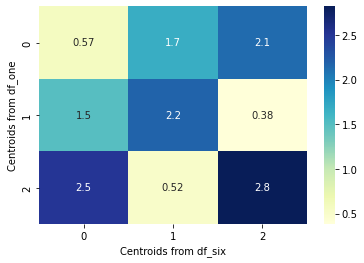

In [67]:
import seaborn as sns

sns.heatmap(distances, annot=True, cmap='YlGnBu')
plt.xlabel('Centroids from df_six')
plt.ylabel('Centroids from df_one')
plt.show()


/tmp/ipykernel_453775/2377673685.py:8: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(centroids_0[:, 0], centroids_0[:, 1], marker='x', s=200, c='green', label='Centroids 0', edgecolors='black')
/opt/conda/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


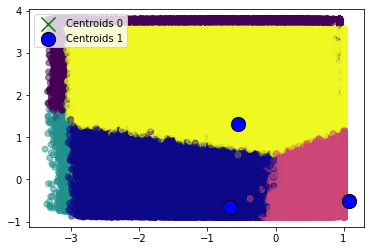

In [68]:
import matplotlib.pyplot as plt

# Standardize and plot df_zero first
X_zero = df_zero[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp']]
X_zero_scaled = scaler.fit_transform(X_zero)

plt.scatter(X_zero_scaled[:, 0], X_zero_scaled[:, 1], c=kmeans0.labels_, cmap='viridis', alpha=0.5)
plt.scatter(centroids_0[:, 0], centroids_0[:, 1], marker='x', s=200, c='green', label='Centroids 0', edgecolors='black')

# Standardize and plot df_one
X_one = df_one[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp']]
X_one_scaled = scaler.fit_transform(X_one)

plt.scatter(X_one_scaled[:, 0], X_one_scaled[:, 1], c=kmeans1.labels_, cmap='plasma', alpha=0.5)
plt.scatter(centroids_1[:, 0], centroids_1[:, 1], marker='o', s=200, c='blue', label='Centroids 1', edgecolors='black')

plt.legend()
plt.show()
